# Day 2 - Data Cleaning Basics

In [1]:
import pandas as pd

# Load sample dataset (replace with your own later)
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Preview the data
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
## Trying out commands

#df.info() #datatype and total counts and null counts
#df.describe() #metadata
#df.isnull() #all cells T/F basis null or not
#df.isnull().sum() #col wise #nulls
#df.duplicated() #row wise which ones are duplicates T/F
#df.duplicated().sum() #all across #duplicated rows
#df.drop_duplicates(inplace = True)


“Today I learned how to inspect and clean missing and duplicate values using pandas.”

In [3]:
import pandas as pd

nums = [1, 2, 3]
#squares = list(map(lambda x: x**2, nums))
squ = list(map(lambda x:x**2, nums))
even = list(filter(lambda x: x%2==0, nums))
even_squ = list(map(lambda x: x**2, even))
squ, even, even_squ

## Error Handling
"""try:
    num = int(5) #input goes here
    print(10/num)
except ValueError:
    print("Invalid Input, enter a number")
except ZeroDivisionError:
    print("Can't divide by 0")
else:
    print("No error")
finally:
    print("All done.")"""

## Pandas df pivot creation
df = pd.DataFrame({
    'Team': ['A', 'A', 'B', 'B','B','B'],
    'Year': [2020, 2021, 2020, 2021, 2020, 2020],
    'Points': [10, 15, 12, 20, 5, 5]
})

pivot = pd.pivot_table(df, values='Points', index='Team', columns='Year', aggfunc='nunique')
pivot
#aggfunc = mean/sum/count/nunique etc.


Year,2020,2021
Team,,
A,1,1
B,2,1


# Day 3 — Exploratory Data Analysis (EDA)
Dataset: seaborn `tips` (placeholder) — will replace with churn dataset later
Author: Divyanshi
Date: 2025-11-16

This notebook performs comprehensive exploratory data analysis on the customer churn dataset, covering:
- Data quality checks  
- Univariate & bivariate analysis  
- Churn behavior patterns  
- Service usage insights  
- Visual summaries  
- Feature correlation  
- Business interpretations  

This analysis prepares the dataset for feature engineering and modeling.


In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 200)
sns.set(style='whitegrid')

In [57]:
# Load a sample dataset (tips) for practice
url = '../data/raw/churn_data.csv'
df = pd.read_csv(url, sep=',')
df.head()

"""The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents"""

'The data set includes information about:\n\nCustomers who left within the last month – the column is called Churn\nServices that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies\nCustomer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges\nDemographic info about customers – gender, age range, and if they have partners and dependents'

In [58]:
df.info()
#df.describe(include='all')
df.isnull().sum()
#df.nunique()
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
727,6786-OBWQR,Female,0,Yes,Yes,5,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.85,356.1,No
3406,6447-EGDIV,Female,0,No,No,31,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.95,683.25,No
3131,8336-TAVKX,Female,1,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),78.45,5682.25,No
4698,8166-ZZTFS,Female,1,Yes,No,66,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.55,5265.1,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No


In [59]:
df.loc[df['customerID'] == "3803-KMQFW"]

79.85*31 #shows that in this case: total charges != monthly charges * tenure even in the case of month-to-month contracts
# we have to check for entire population if we take this assumption in case of nans in total charges, would it work 

2475.35

In [60]:
#Total charges should be float instead of an object

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [61]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

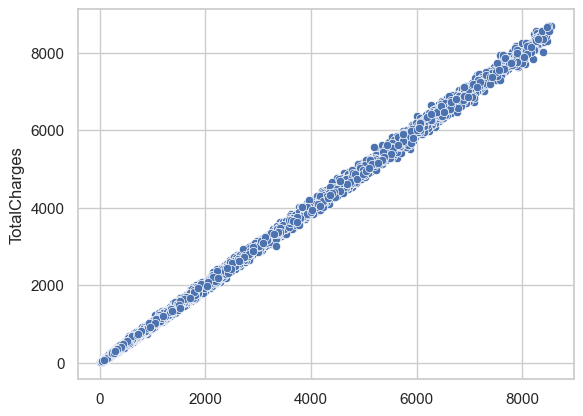

In [62]:
# check formula validity : Total Charges = Monthly charges * Tenure

(df['MonthlyCharges']*df['tenure']).describe()
df['TotalCharges'].describe()

#checking distribution similarity
sns.scatterplot(x=df['MonthlyCharges']*df['tenure'], y=df['TotalCharges'])

df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'], inplace=True)

In [63]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

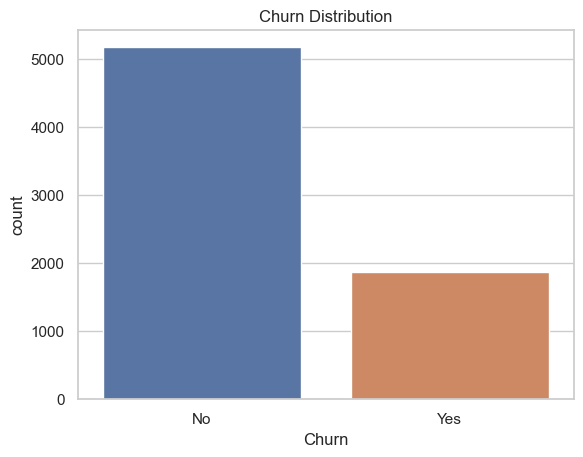

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [64]:
# health check churn (target variable) - UNIVARIATE ANALYSIS 1.0

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

df['Churn'].value_counts(normalize=True)



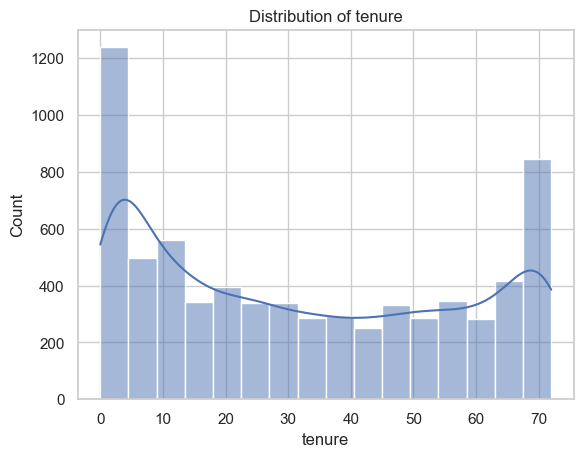

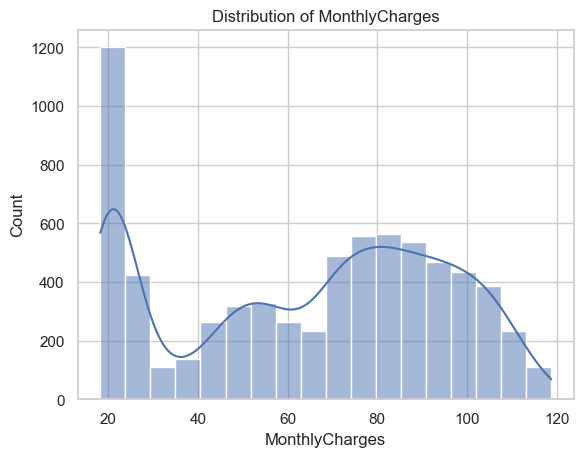

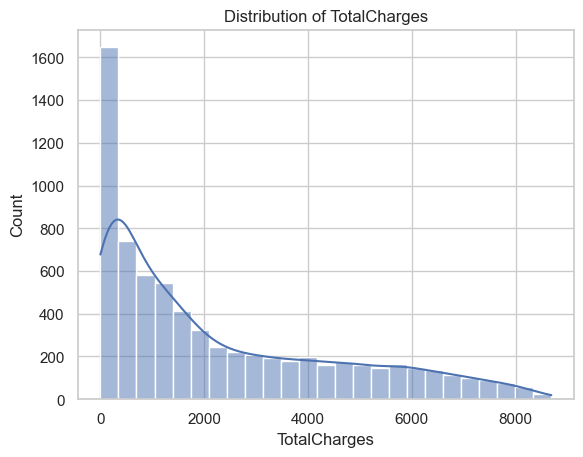

In [65]:
# UNIVARIATE ANALYSIS 2.0 - Numerical variables

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


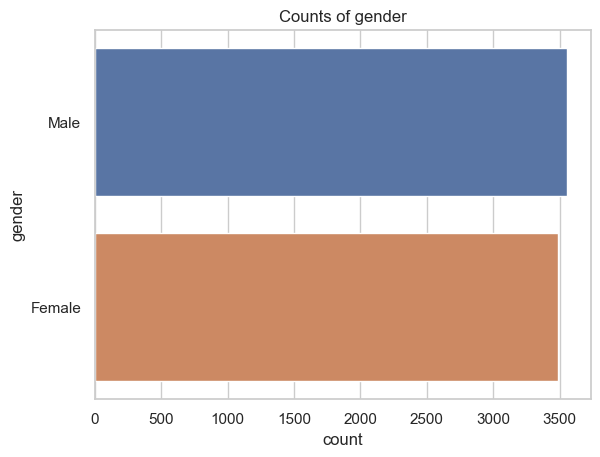

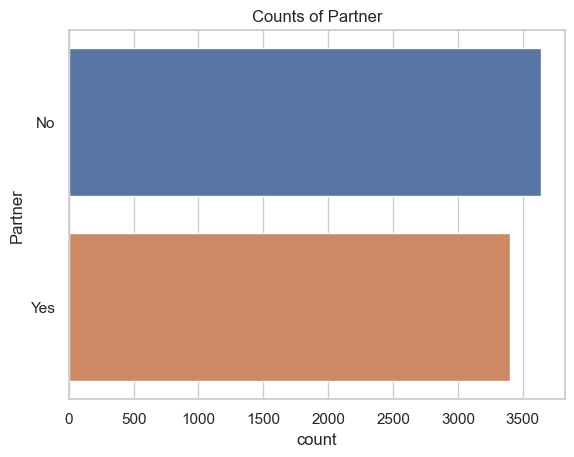

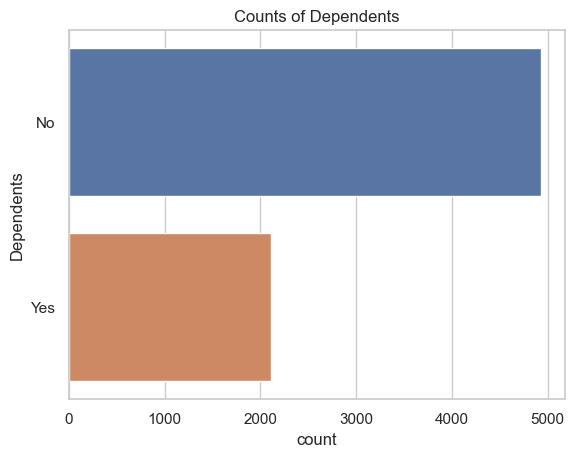

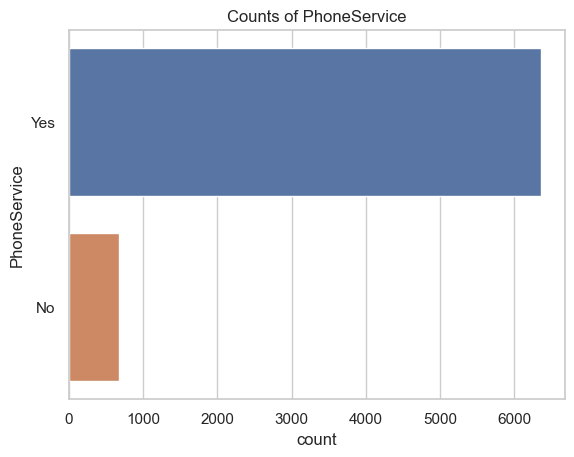

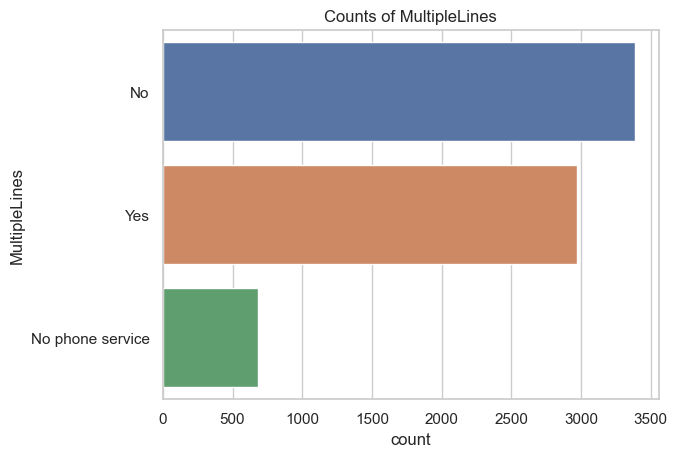

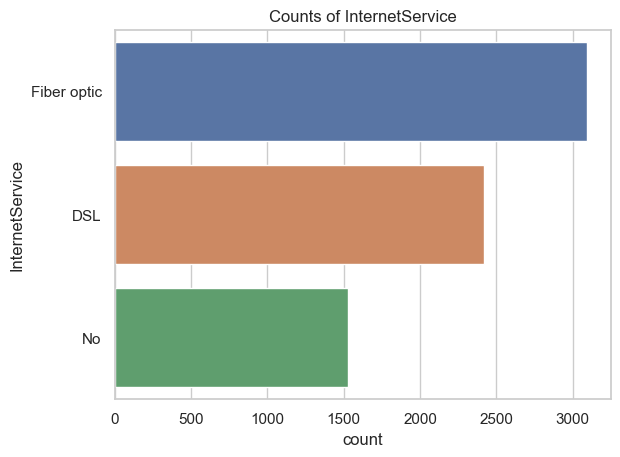

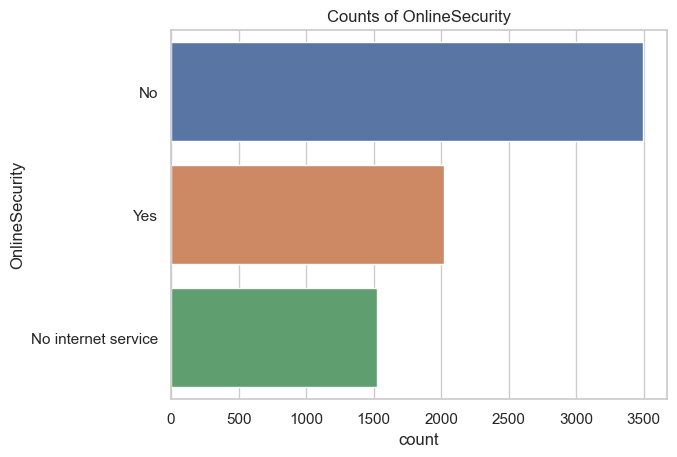

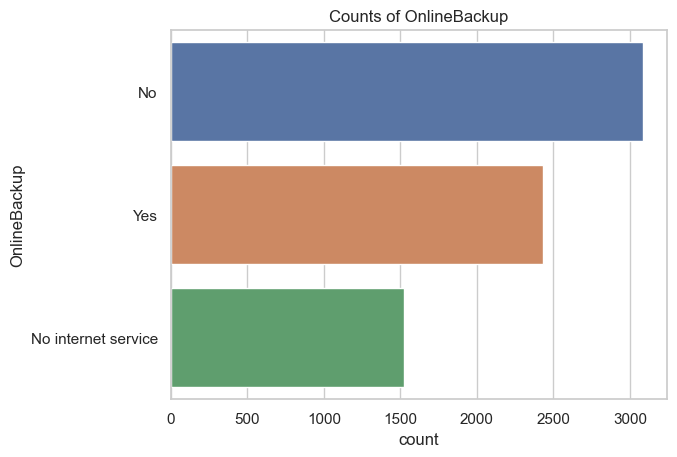

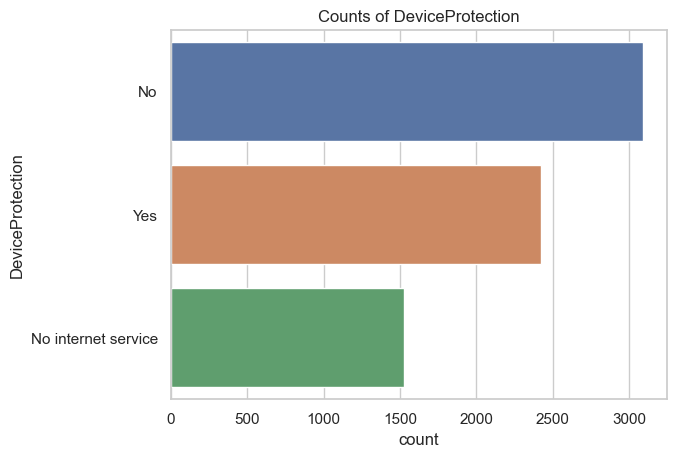

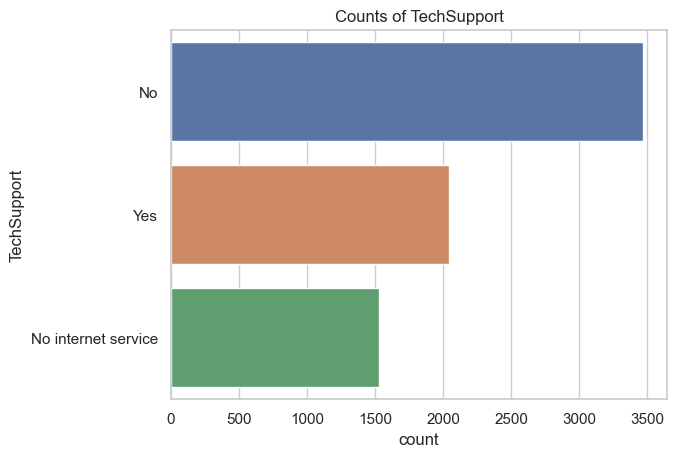

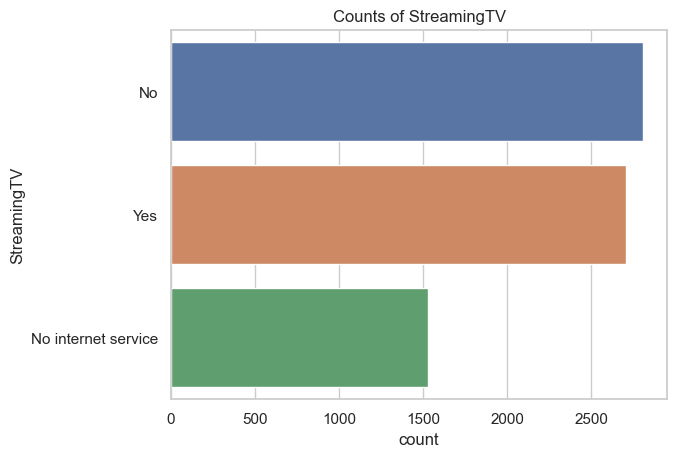

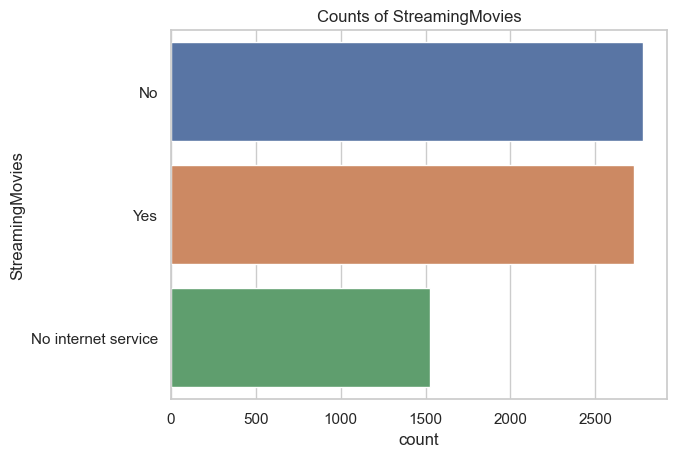

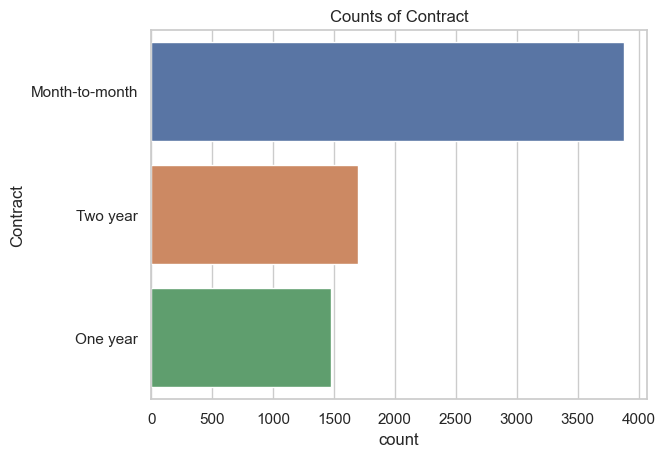

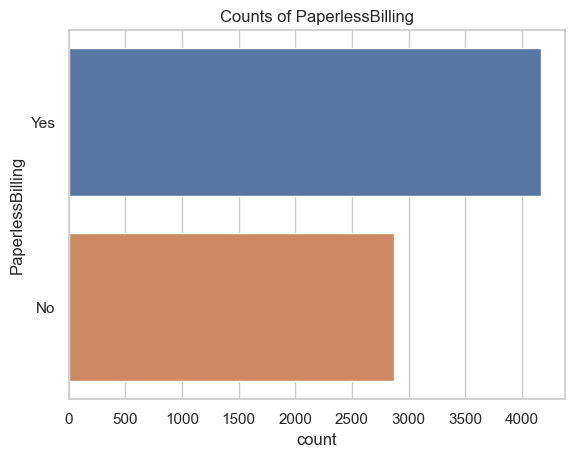

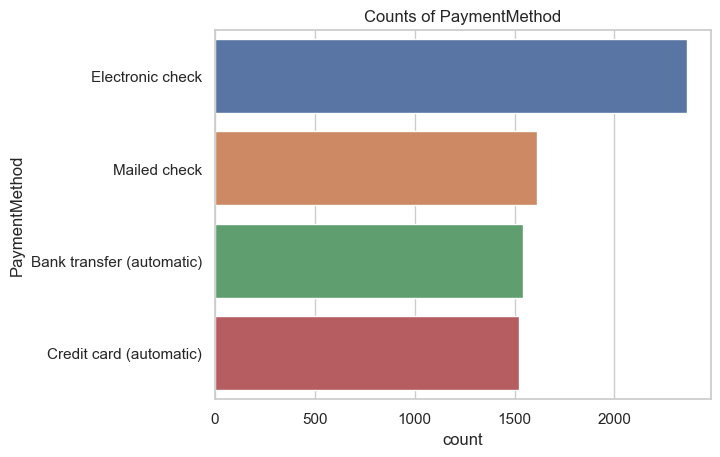

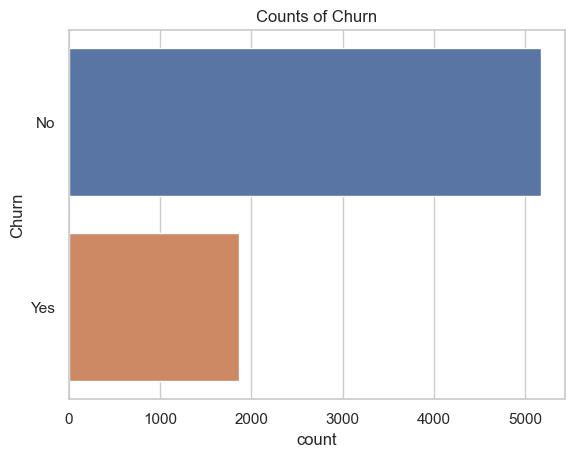

In [66]:
# UNIVARIATE ANALYSIS 3.0 : CATEGORICAL VARIABLES

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('customerID')  # drop ID

for col in cat_cols:
    plt.figure()
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.show()


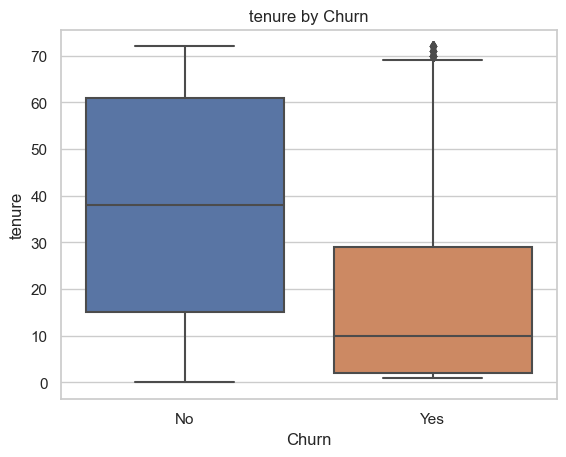

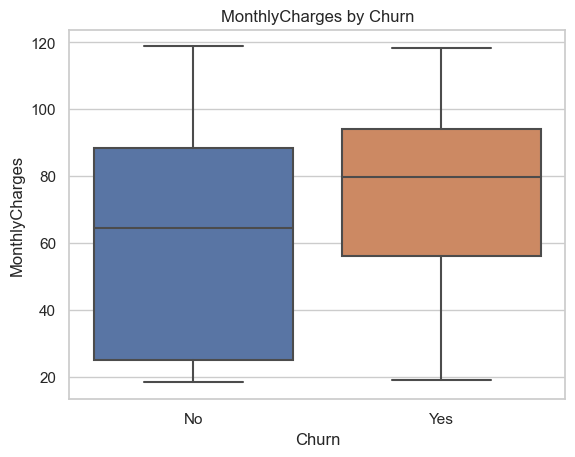

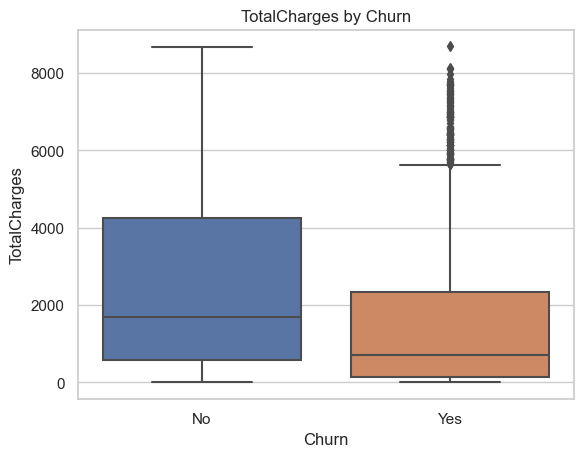

In [67]:
# BIVARIATE ANALYSIS 1.0 : CHURN VS NUMERICAL VARIABLES

for col in num_cols:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} by Churn")
    plt.show()



## 📌 Interpretation — Churn vs Numerical
- Do churned customers have higher monthly charges?
- What is tenure distribution for churn vs non-churn?
- Are total charges much lower for churn? (Typically yes → customers churn early)

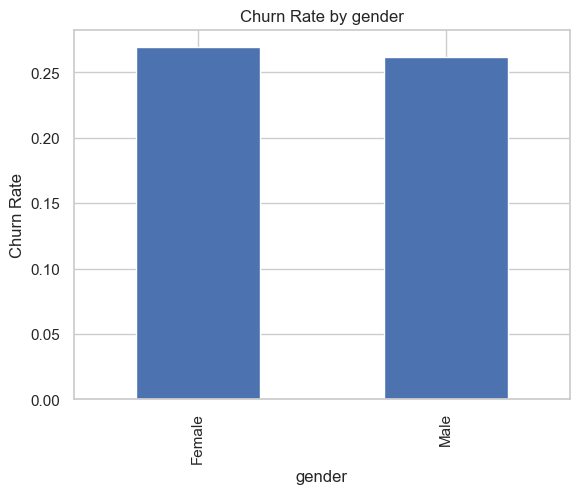

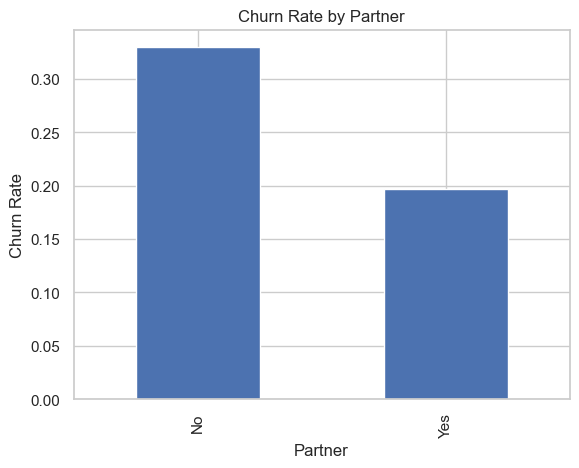

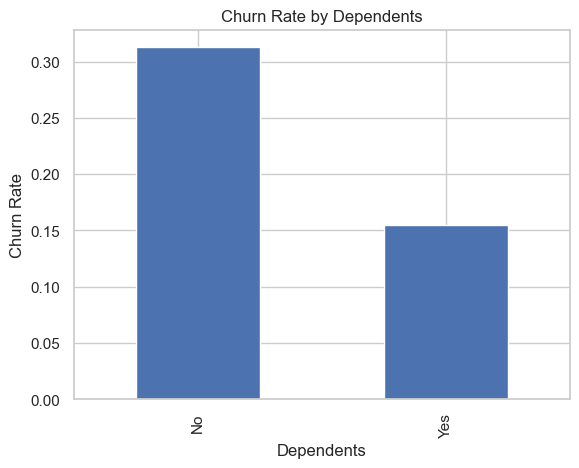

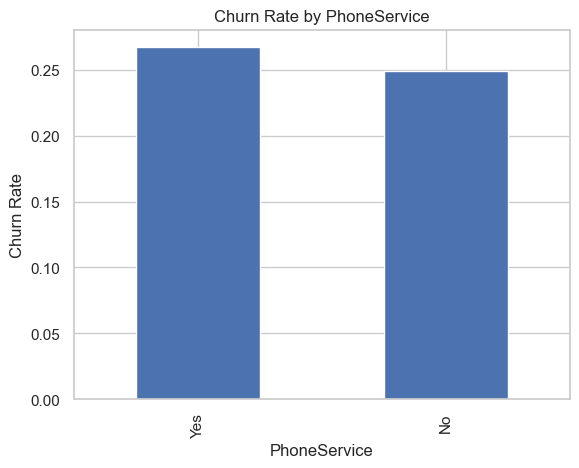

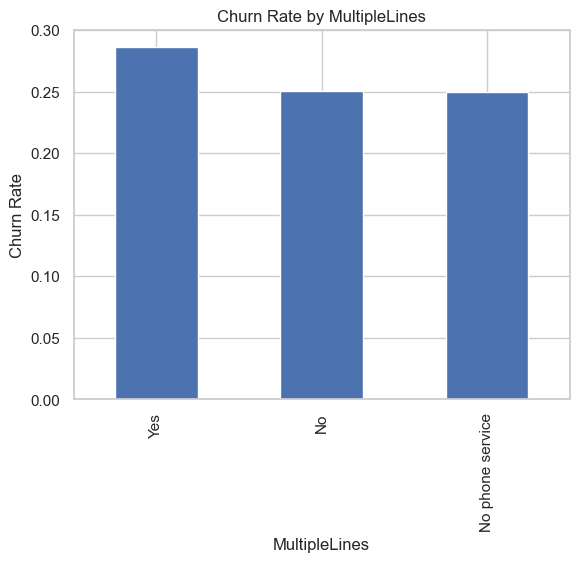

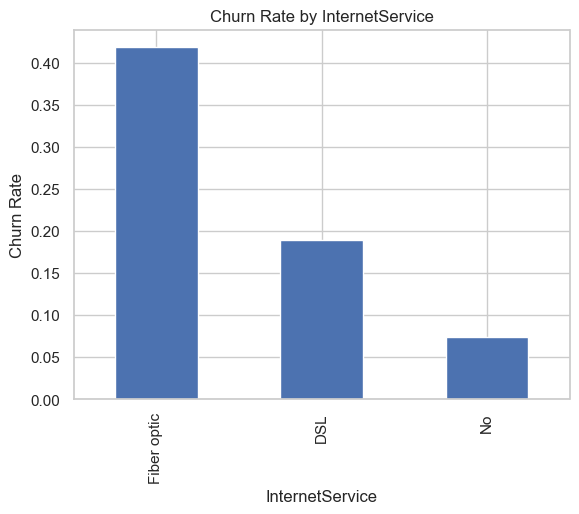

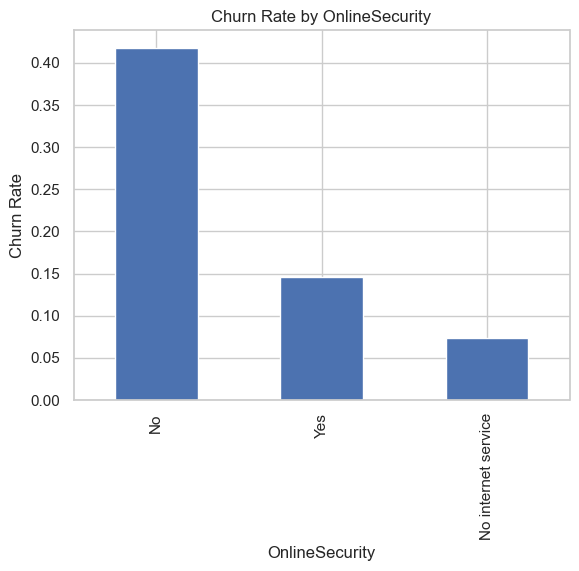

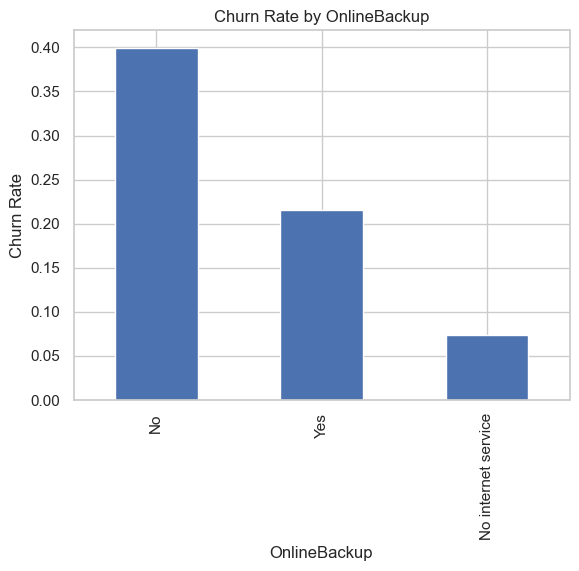

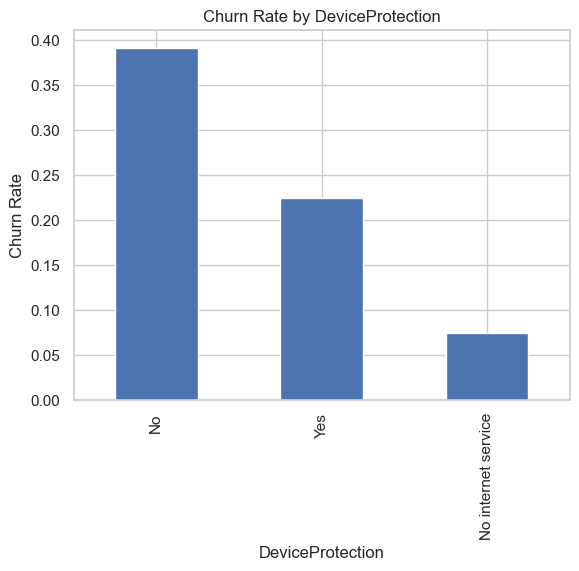

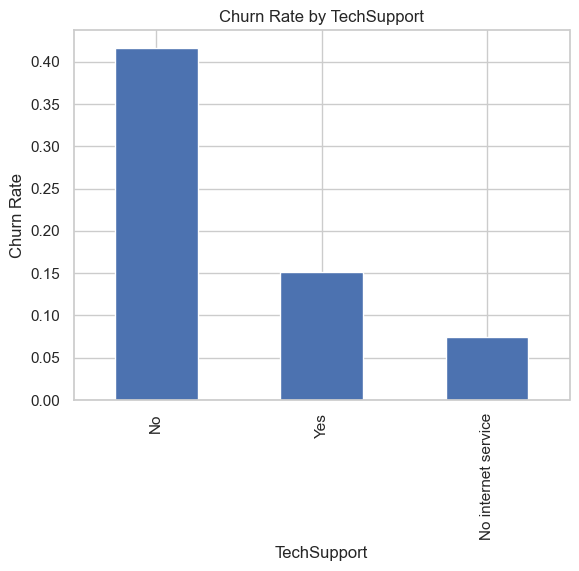

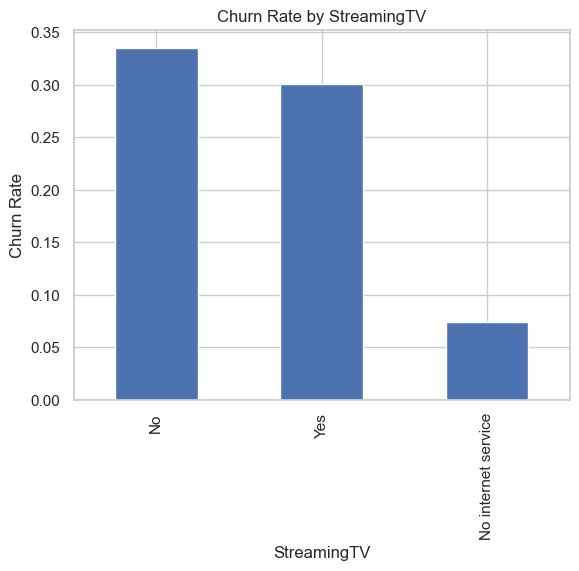

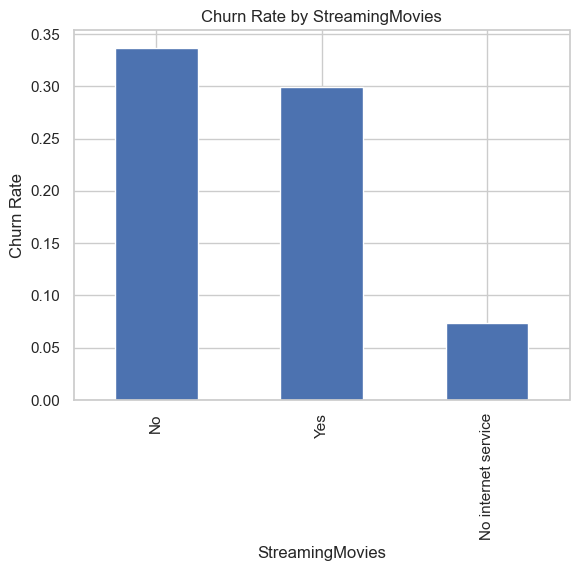

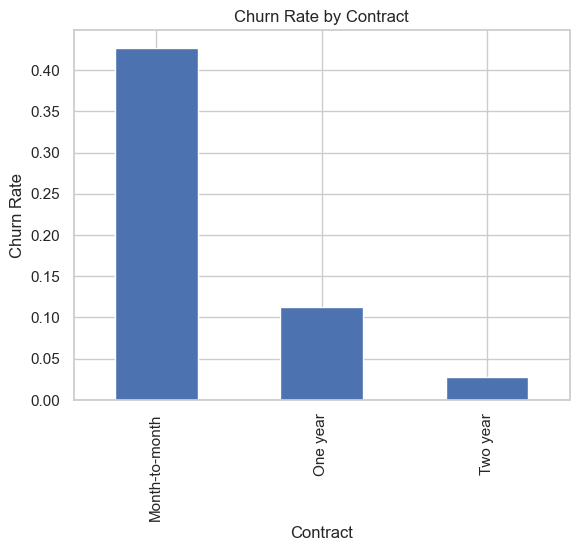

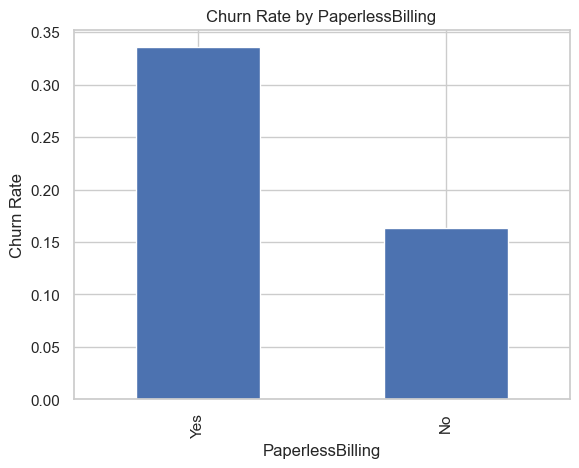

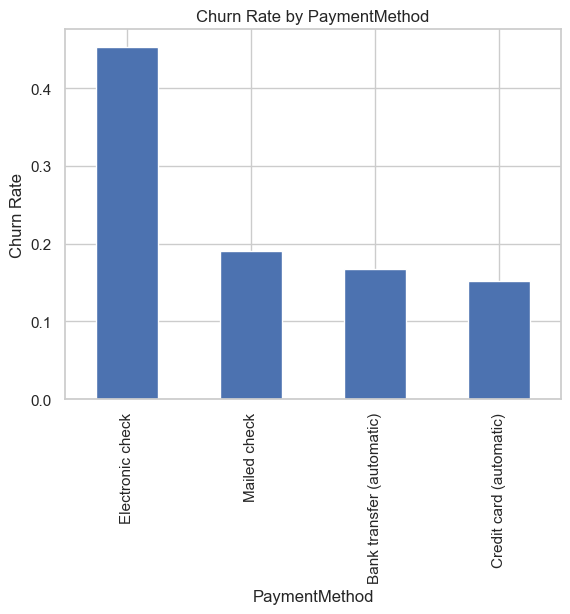

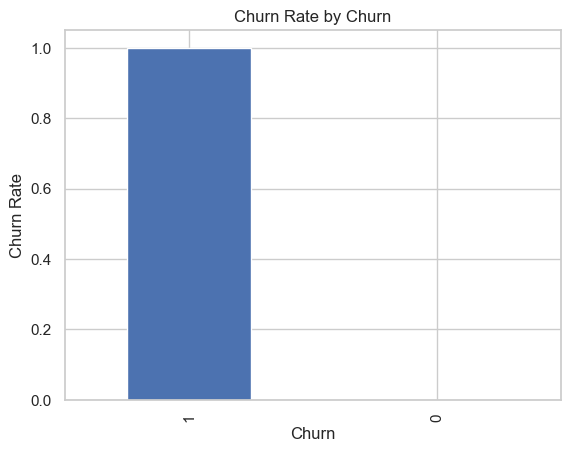

In [68]:
#BIVARIATE ANALYSIS 2.0 : CHURN VS CATEGORICAL VARIABLES

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

for col in cat_cols:
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    churn_rate.plot(kind='bar')
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()


## 📌 Interpretation — Churn vs Categorical
Highest churn segments:

-- Monthly contract customers (high churn)  
-- Fiber optic users (high churn)  
-- Electronic check payment users  
-- Customers without tech support, online backup and online security
-- customer who opt for paperless billing
-- single people churn more 

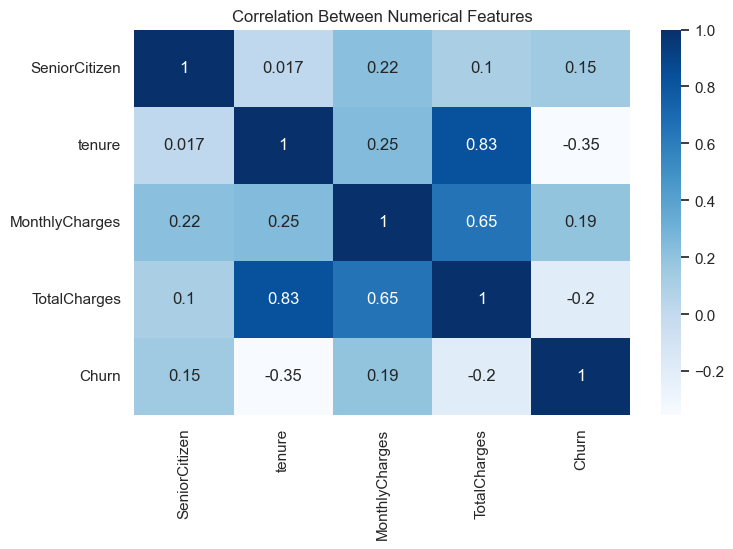

In [69]:
# CORRELATION HEATMAP (NUMERICAL COLS)

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Between Numerical Features")
plt.show()


## 📌Takeaways from correlation matrix

1. total charges highly correlated with both monthly charges and tenure (useful but redundant due to possibility of multicollinearity)
2. Churn has negative correlation with tenure and total charges both
3. Senoir citizen flag has low predictive power

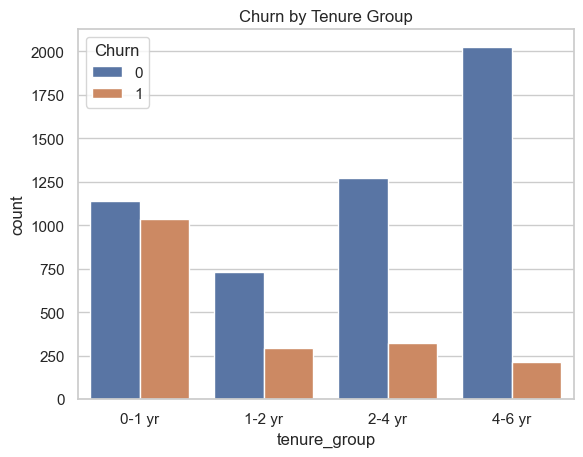

In [70]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-1 yr','1-2 yr','2-4 yr','4-6 yr'])

sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.show()

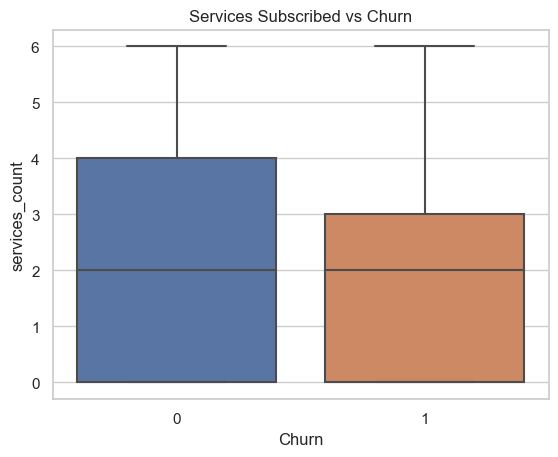

In [71]:
service_cols = [
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies'
]

df['services_count'] = df[service_cols].apply(lambda x: (x=='Yes').sum(), axis=1)

sns.boxplot(x='Churn', y='services_count', data=df)
plt.title('Services Subscribed vs Churn')
plt.show()


# 📌 Key Insights from EDA

### 1. **Customer Tenure**
- Majority of churners have tenure < 12 months.
- Long-term customers rarely churn.

### 2. **Contract Type**
- Monthly contracts show highest churn.
- Yearly contracts show very low churn.

### 3. **Monthly Charges**
- Customers with very high monthly charges churn more.

### 4. **Internet Service**
- Fiber optic users churn more than DSL.

### 5. **Support Features**
- Lack of TechSupport is a major churn indicator.

### 6. **Payment Method**
- Electronic cheque users churn highest.

### 7. **Services Count**
- More services subscribed → lower churn probability.


In [72]:
df.to_csv('../data/processed/churn_cleaned.csv', index=False)
print("Processed dataset saved to data/processed/")

Processed dataset saved to data/processed/
